In [146]:
import pandas as pd 

data = pd.read_csv("data.csv", header = None)
data.head()

X = data.loc[:, 0:4]

y = data.loc[:, 5]
y.head()

0     90.0
1     39.0
2    160.0
3    101.0
4    180.0
Name: 5, dtype: float64

In [149]:
def cost_function(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return J

def pred(X, theta):
    return X.dot(theta)

def my_mse(y_pred, y_test):
    return np.sum((y_pred - y_test)**2)/len(y_pred)

def localy_weighted_regression(X, Y, theta, alpha, iterations, xp):
    m = len(Y)
    tau = 1
    W = np.zeros((m,1))
    
    for i in range(m):
        W[i][0] = np.exp(-(np.linalg.norm(X[i] - xp)/tau)**2/2)   
        
    for iteration in range(iterations):
        theta = theta - alpha * X.T.dot(W*(X.dot(theta) - Y).reshape(m,1)) / m

    return theta

In [150]:
# Initial Coefficients

alpha = 0.1
iter_ = 10000

X = data.loc[:, 0:4]

y = data.loc[:, 5]

X = np.array(X)
y = np.array(y)
y = y.reshape(len(y),1)

X = (X-X.mean())/X.std()
X = np.c_[np.ones(len(X),dtype='int64'),X]

theta = np.zeros((X_train.shape[1], 1))

sum_err = 0
y_pred = []
for i in range(X.shape[0]):
    new_theta = localy_weighted_regression(np.concatenate((X[:i], X[i+1:])), np.concatenate((y[:i], y[i+1:])), theta, alpha, iter_, X[i])

    y_pred.append(X[i].dot(new_theta))


print(my_mse(np.array(y_pred), y))

3562.9832469556854


In [139]:
new_theta

array([[148.10925212],
       [ 30.5883596 ],
       [-10.43486265],
       [ 10.49348634],
       [ 34.25945842],
       [ -1.43487296]])

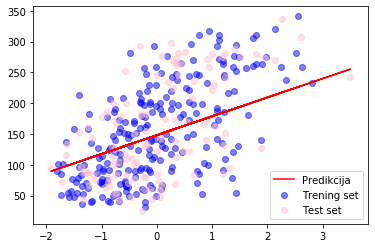

In [141]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(X_train[:,1], y_train, color = 'blue', alpha = 0.5)
plt.scatter(X_test[:,1], y_test, color = 'pink', alpha = 0.5)
plt.plot(X_test[:,1], X_test[:,1]*new_theta[1] + new_theta[0], color='red')
plt.legend(['Predikcija', 'Trening set', 'Test set'])